In [1]:
import numpy as np
import pandas as pd
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #from mpl_toolkits.mplot3d import Axes3D

In [2]:
lists = [[ 40, 150, 0 ],
        [ 50, 150, 0 ],
        [ 60, 150, 0 ],
        [ 40, 160, 0 ],
        [ 40, 170, 0 ],
        [ 50, 160, 0 ],
        [ 50, 180, 1 ],
        [ 60, 180, 1 ],
        [ 70, 180, 1 ],
        [ 60, 170, 1 ],
        [ 70, 170, 1 ],
        [ 70, 160, 1 ]]
df = pd.DataFrame(lists, columns=['Mass','Height','Gender'])

In [3]:
df['Mass']=(df['Mass']-df['Mass'].mean())/df['Mass'].std() # normalization
df['Height']=(df['Height']-df['Height'].mean())/df['Height'].std()
#https://stats.stackexchange.com/questions/458579/should-i-normalize-all-data-prior-feeding-the-neural-network-models

<IPython.core.display.Javascript object>


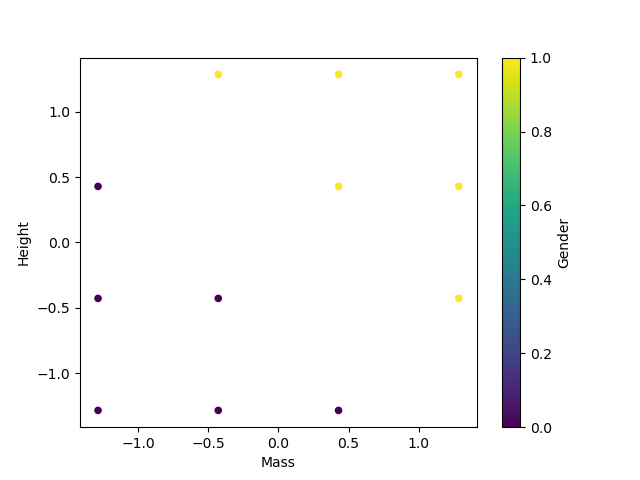

In [4]:
ax = df.plot.scatter(x='Mass',y='Height',c='Gender',colormap='viridis')

In [ ]:
def sigmoid(x): #ranges from -4 to 4
    return 1/(1 + np.exp(-x))#1 / (1 + math.exp(-x))

def feedforward(x,y):
    return sigmoid(x*w1[-1] + y*w2[-1] + b[-1])

#Mean Squared Error(Brier) updates gradient slowly because of asymptotes of sigmoid, CrossEntropy works faster

#df.y1 and df.Gender
def CrossEntropy(yHat, y): #loss function for cost
        return -log(yHat) if y == 1 else -log(1 - yHat) #Binary Cross Entropy
    #-(y*log(yHat) + (1-y)*log(1-yHat))
    
def BrierLoss(yHat, y):
#SSE loss https://stats.stackexchange.com/questions/264625/why-use-squared-loss-on-probabilities-instead-of-logistic-loss
    return (yHat - y)**2
'''
Arg max sets largest value to one and other values to zero
It can't be used to optimize weights & biases of NN. Because they are constant MAX(a,b,c) and gets 0 in gradient descent

Soft max: e^i / e^a + e^b + e^c
'''

In [6]:
#w = [10**x for x in range(-5,5)]
#b = [b for b in range[150,180]]
b = [0.0]
w1 = [-5.0]#[1.0]#-0.13
w2 = [1.0]#-0.04

r = 10 #learning rate

df['y1'] = feedforward(df.Height,df.Mass)

y1_list = [df.y1]
#df.apply(lambda x: np.tanh(x.Height + x.Mass), axis=1)

#logloss = df.apply(lambda x: -math.log(max( x.y1, 1e-15 )) if x.Gender == 1 else -math.log(max( 1 - x.y1, 1e-15 )), axis=1)
sseloss = [df.apply(lambda x : (x.y1 - x.Gender)**2, axis=1)]

<IPython.core.display.Javascript object>


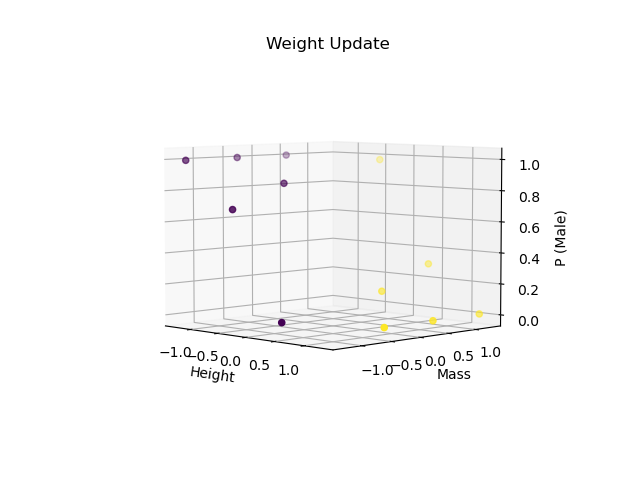

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Datapoints Scatterplot')
ax.view_init(5, -45)
title = ax.set_title('Weight Update')
ax.set_xlabel('Height')
ax.set_ylabel('Mass')
ax.set_zlabel('P (Male)')
ax.scatter3D(df.Height, df.Mass, y1_list[-1], c=df.Gender, cmap='viridis');

In [8]:
#Partial Derivative of Cost Function with Respect to Network Weight
def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

C = (y1 - Gender)^2
y1 = sigmoid(z)
z = df.Height*w1 + df.Mass*w2 + b

Chain Rule: dC / dw1 = dC / dy1 * dy1 / dz * dz / dw1

dC / dw1 = 2(y1 - Gender) * sigmoid_p(z) * df.Height
dC / dw2 = 2(y1 - Gender) * sigmoid_p(z) * df.Mass
dC / db  = 2(y1 - Gender) * sigmoid_p(z)

Updating Weight
w1 = w1 - r*(dC / dw1)
w2 = w2 - r*(dC / w2)
b  = b - r*(dC / b)

In [9]:
#backprop
for i in range (1,20):
    dw1 = df.apply(lambda x : 2 * (x.y1 - x.Gender) * sigmoid_p(x.Height*w1[-1] + x.Mass*w2[-1] + b[-1]) * x.Height, axis=1)
    dw2 = df.apply(lambda x : 2 * (x.y1 - x.Gender) * sigmoid_p(x.Height*w1[-1] + x.Mass*w2[-1] + b[-1]) * x.Mass, axis=1)
    db   = df.apply(lambda x : 2 * (x.y1 - x.Gender) * sigmoid_p(x.Height*w1[-1] + x.Mass*w2[-1] + b[-1]), axis=1)
    
    w1.append(w1[-1] - r*np.mean(dw1))
    w2.append(w2[-1] - r*np.mean(dw2))
    b.append(b[-1] - r*np.mean(db))
    
    y1_list.append(sigmoid(df.Height*w1[-1] + df.Mass*w2[-1] + b[-1]))
    
    sseloss.append((y1_list[-1] - df.Gender)**2)

<IPython.core.display.Javascript object>


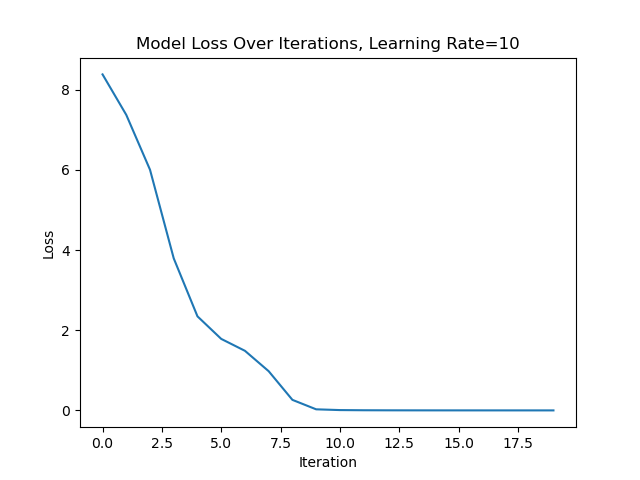

In [10]:
#pd.DataFrame(sseloss).plot(x=sseloss.index, y=sselokind = 'line')
#plt.axes(projection='rectilinear')

fig = plt.figure()
plt.title('Model Loss Over Iterations, Learning Rate={}'.format(r))
loss_plot = plt.plot([x for x in range(0,len(sseloss))], [np.sum(x) for x in sseloss] )
plt.xlabel('Iteration');
plt.ylabel('Loss');

#color='red', marker='o')
#plt.plot([x for x in range(0,len(sseloss))], [np.sum(x) for x in sseloss] )
#plt.title('Unemployment Rate Vs Year', fontsize=14)

#plt.show()

In [ ]:
'''
Code for Derivatives

from sympy import symbols, diff
 x, y, z = symbols('x y z', real=True)
 f = 4*x*y + x*sin(z) + x**3 + z**8*y
 diff(f, x)
4*y + sin(z) + 3*x**2
'''

In [11]:
#p1 is weight1 and p2 is weight2, we are fixing bias to value from last iteration of backprop
def lossfunction(p1, p2):
    return np.sum(df.apply(lambda x : (sigmoid(x.Height*p1 + x.Mass*p2 + b[-1]) - x.Gender)**2, axis=1))

<IPython.core.display.Javascript object>


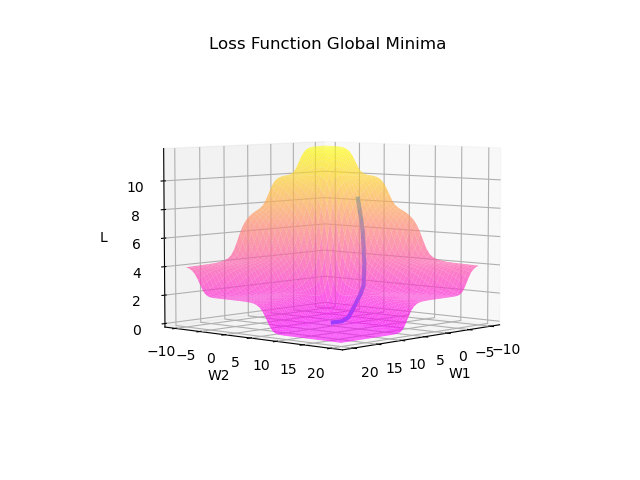

In [12]:
x = np.linspace(-10, 20)#, 30)
y = np.linspace(-10, 20)#, 30)

X, Y = np.meshgrid(x, y)
Z = lossfunction(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(5, 42)
#ax.contour3D(X, Y, Z, 50, cmap='binary')
#ax.plot_wireframe(X, Y, Z, color='black')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap="spring", edgecolor='none', alpha = 0.7)

ax.plot(w1, w2, [np.sum(x) for x in sseloss], linewidth=3, color='dodgerblue')

ax.set_title('Loss Function Global Minima');

ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('L');

In [13]:
from matplotlib.animation import FuncAnimation, PillowWriter

<IPython.core.display.Javascript object>


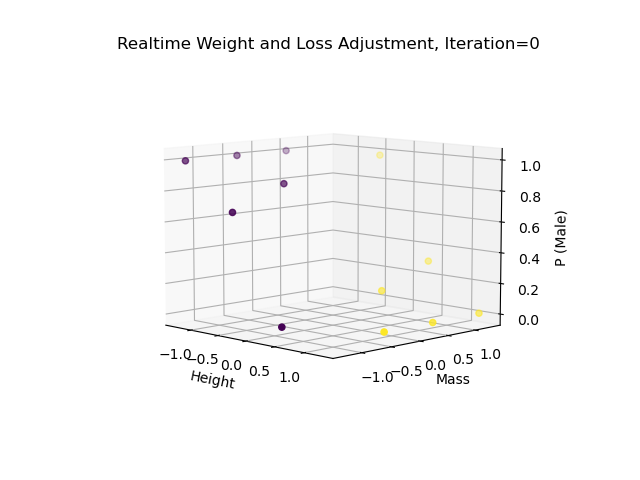

In [14]:
def update_graph(num):
    graph._offsets3d = (df.Height, df.Mass, y1_list[num])
    title.set_text('Realtime Weight and Loss Adjustment, Iteration={}'.format(num))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(8, -45)
title = ax.set_title('Weight Update')
ax.set_xlabel('Height')
ax.set_ylabel('Mass')
ax.set_zlabel('P (Male)')

graph = ax.scatter(df.Height, df.Mass, y1_list[-1], c=df.Gender, cmap='viridis')

ani = FuncAnimation(fig, update_graph, frames=20, interval=500, blit=False)

#writer = PillowWriter(fps=10)  
#ani.save("backprop.gif", writer=writer) 

plt.show()